<a href="https://colab.research.google.com/github/yoshihikom/thu_Details_of_Management_Information_BII_Lesson11/blob/main/Details_of_Management_Information_BII_11_Text_Analysis(2)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経営情報各論BⅡ：11．テキスト分析(2) テキスト分析(1)の追加（その２）共起ネットワーク

この講義では，主に単語と単語の結びつきの強さを統計的に測る方法を学びます．具体的には，まずは，文字や語の連なりを使う方法について学びます．次に，単純な共起頻度を使う方法を学びます．そして，共起強度を用いるダイス係数や相互情報量，共起有意性を用いる対数尤度比やTスコアといった方法について学びます．また，単語の共起関係をネットワークの形式で可視化する方法（共起ネットワーク）についても学びます．

## 2.1 N-gramの分析
N-gramは，隣同士の文字や語，つまり文字や語の「連なり」を単として分析で，連なりの頻度分布を測定し利用します．１つだけの要素の場合は1-gram(モノグラム，monogram），2-gram（バイグラム，bigram）は２つの要素のつながり，3-gram（トライグラム，trigram）は３つの要素のつながりのパターンです．テキストの分析では，文字のN-gramや単語のN-gramを考えます．
### 文字のN-gramの分析
文字を単位としたN-gramを切り出して，出現回数を数えるプログラムを以下に示します．
入力テキスト"string"に対して，文字の2-gramと3-gramを出力（出現回数の上位50文字）します．右端の数字は出現回数です．回数をカウントしたデータが辞書型なので，出力での出現順序は同じ出現回数では不同になっています．

文字のN-gramの分布は算出が容易なので，テキストの類似度や著者判定での特徴量などとして多く利用されます．著者の判定には，一般にはこの特徴量だけでは不十分なので，他の特徴量と組み合わせて判定することが多いです．

以下に文字のN-gram（2-gramと3-gram）を切り出して出現回数を算出するpythonプログラム例を示します．stringに分析対象の分（ここでは本講義の序文）を指定します．

In [ ]:
# -*- coding: utf-8 -*-
# N-gram を切り出して出現回数を数えるプログラム例
from collections import Counter
import numpy as np
string = "本日の講義では，主に単語と単語の結びつきの強さを統計的に測る方法を学びます．具体的には，まずは，文字や語の連なりを使う方法について学びます．次に，単純な共起頻度を使う方法を学びます．そして，共起強度を用いるダイス係数や相互情報量，共起有意性を用いる対数尤度比やTスコアといった方法について学びます．また，単語の共起関係をネットワークの形式で可視化する方法（共起ネットワーク）についても学びます．"
delimiter = ['「', '」', '…', '　']

doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ),  \
                  doublets)

triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)

dic2 = Counter(doublets)
for k,v in sorted(dic2.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)

dic3 = Counter(triplets)
for k,v in sorted(dic3.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)

('方', '法') 5
('学', 'び') 5
('び', 'ま') 5
('ま', 'す') 5
('す', '．') 5
('共', '起') 5
('は', '，') 3
('単', '語') 3
('語', 'の') 3
('に', 'つ') 3
('つ', 'い') 3
('い', 'て') 3
('的', 'に') 2
('る', '方') 2
('法', 'を') 2
('を', '学') 2
('を', '使') 2
('使', 'う') 2
('う', '方') 2
('法', 'に') 2
('て', '学') 2
('，', '単') 2
('度', 'を') 2
('，', '共') 2
('を', '用') 2
('用', 'い') 2
('い', 'る') 2
('ネ', 'ッ') 2
('ッ', 'ト') 2
('ト', 'ワ') 2
('ワ', 'ー') 2
('ー', 'ク') 2
('本', '日') 1
('日', 'の') 1
('の', '講') 1
('講', '義') 1
('義', 'で') 1
('で', 'は') 1
('，', '主') 1
('主', 'に') 1
('に', '単') 1
('語', 'と') 1
('と', '単') 1
('の', '結') 1
('結', 'び') 1
('び', 'つ') 1
('つ', 'き') 1
('き', 'の') 1
('の', '強') 1
('強', 'さ') 1
('学', 'び', 'ま') 5
('び', 'ま', 'す') 5
('ま', 'す', '．') 5
('に', 'つ', 'い') 3
('つ', 'い', 'て') 3
('単', '語', 'の') 2
('る', '方', '法') 2
('方', '法', 'を') 2
('法', 'を', '学') 2
('を', '学', 'び') 2
('を', '使', 'う') 2
('使', 'う', '方') 2
('う', '方', '法') 2
('方', '法', 'に') 2
('法', 'に', 'つ') 2
('い', 'て', '学') 2
('て', '学', 'び') 2
('，', '共', '起') 2
('を', '用', 'い') 2
('用', 'い

### 語のN-gramの分析
単語を単位としたN-gramも，語のN-gramと同様に算出が容易なので，いろいろな場面で利用されます．基本は形態素解析をした後，単語ごとにN-gramの出現頻度を数えれば済みます．  
以下に例題を示します．  
ここでは，Pythonで自然言語を処理するときによく使われるパッケージNLTK(Natural Language Toolkit, http://www.nltk.org/ )に含まれるコーパスデータの中のjeita(JEITA Public Morphologically Tagged Corpus)という名前の，日本語の形態素解析済みの品詞タグ付きのコーパスが入っています．内容は，青空文庫(著作権が消滅したり著作権者が許諾した文学作品を，電子フォーマットで無償で提供．http://www.aozora.gr.jp )とプロジェクト杉田玄白(http://www.genpaku.org/ )から収集したものからなっています．それぞれのファイルは分かち書きのリスト（単語のリスト）になっています．  
以下のプログラム例では，青空文庫の1000.chasenというファイルのコーパスを利用して，語の2-gramと3-gramの頻度データを辞書型(dic2とdic3）に保持します．コーパスは，jeita_aozoraというディレクトリに一部が入っています．

In [ ]:
# -*- coding: utf-8 -*-
# JEITA コーパスから単語 N-gram 頻度データを生成するプログラム例
from collections import Counter
import numpy as np
from numpy.random import *
import nltk
from nltk.corpus.reader.chasen import *
# JEITAコーパスデータの読み込み
jeita = ChasenCorpusReader('jeita_aozora','1000.chasen', encoding='utf-8')
delimiter = ['「', '」', '…', '　']  # N-gramデータで対象外にする文字のリスト
string = jeita.words()
doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ), \
                   doublets)

triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
dic2 = Counter(doublets)  # 2-gramの出現回数リスト
dic3 = Counter(triplets)  # 3-gramの出現回数リスト
for u,v in dic2.items():
    print(u, v)
for u,v in dic3.items():
    print(u, v)

('ありふれ', 'た') 1
('た', '従来') 1
('従来', 'の') 1
('の', '日本') 2
('日本', '文学') 1
('文学', '史') 1
('史', 'を') 1
('を', 'みる') 1
('みる', 'と') 1
('と', '、') 2
('、', '明治') 1
('明治', '三十') 1
('三十', '年代') 1
('年代', 'に') 1
('に', '写生') 2
('写生', '文学') 1
('文学', 'という') 1
('という', 'もの') 3
('もの', 'を') 1
('を', 'はじめて') 1
('はじめて', '提唱') 1
('提唱', 'し') 1
('し', 'た') 5
('た', '文学') 2
('文学', '者') 1
('者', 'として') 1
('として', '正岡子規') 1
('正岡子規', '、') 1
('、', '高浜') 1
('高浜', '虚子') 1
('虚子', 'や') 1
('や', '『') 1
('『', 'ホトトギス') 1
('ホトトギス', '』') 1
('』', '派') 1
('派', 'の') 6
('の', 'こと') 2
('こと', 'は') 3
('は', '出') 1
('出', 'て') 1
('て', '来る') 1
('来る', 'が') 1
('が', '、') 3
('、', '長塚') 1
('長塚', '節') 6
('節', 'の') 4
('は', 'とりたて') 1
('とりたて', 'て') 1
('て', '触れ') 1
('触れ', 'られ') 1
('られ', 'て') 1
('て', 'い') 5
('い', 'ない') 2
('ない', '。') 1
('明治', '十二') 1
('十二', '年') 1
('年', 'に') 2
('に', '茨城') 1
('茨城', '県') 1
('県', 'の') 1
('の', '国') 1
('国', '生') 1
('生', 'という') 1
('という', '村') 1
('村', 'の') 1
('の', '相当') 1
('相当', 'の') 1
('の', '家') 1
('家', 'に') 1
('に', '生れ') 1
(

次に，単語のN-gramを利用する例として，N-gramの頻度データに基づいて文を生成します．あらかじめ測定しておいた2-gramや3-gramの頻度データに従って，ランダムに次の語を選ぶことを繰り返して，句点が出現するまで文を作り続けます．ここでは，上で作成したN-gramのデータに基づいて，単語を次々と発生させて分を作ります．N-gramの出現頻度を，「次に来る語」の確率であると読み替えます．これは，直前にXという単語を出力したとき，Xの次に来る単語としてN-gramの頻度分布で頻度が高い語を選べば，元のデータと似たような単語の並びになるはずだからです．先頭の単語を与えて，次の語，次の語とN-gramの頻度が高い単語を選ぶことを繰り返して，文の終わりの句点「。」が出たら生成終了，という手順で語を並べたものが生成された出力文となります．実際には，次の候補選択の時に常に出現回数が最大のN-gramを取ると，結果が固定してしまうので，出現回数に乱数の重みをかけた候補値から最大のものを選ぶことにします．2-gramに初期値として「子規」を与えた場合と3-gramに初期値として「子規」「の」を与えた場合が，それぞれをコメントアウトすることで実行できます．

In [ ]:
# -*- coding: utf-8 -*-
# 生成した単語 N-gram 頻度データから文を生成するプログラム例
def gennext(words, dic):  # N-gram辞書dicと直前の1語/2語から、次の語を選んで返 す
    grams = len(words)    # 2-gramか3-gramかを、与えたwordが２語か３語かによっ て決める
    if grams==2:
        matcheditems = np.array(list(filter( (lambda x: x[0][0] == words[1]),
              dic.items() )), dtype=object )  # 2-gramの第２項が欲しい語words[1]であるものを 集める
    else:
        matcheditems = np.array(list(filter(
             (lambda x: x[0][0] == words[1]) and (lambda x: x[0][1] == words[2]),
              dic.items() )), dtype=object )  # 3-gramの第２・３項が欲しい語words[1], words[2]であるものを集める
    if (len(matcheditems) == 0):   # 欲しい語のパターンがN-gram辞書に無い場合は中止する
        print("No matched generator for", words[1])
        return ''
    probs = [row[1] for row in matcheditems]    # N-gram辞書の出現回数部分を取 出す
    weightlist = rand(len(matcheditems)) * probs  # 乱数rand(項数)を要素ごとに 掛ける
    if grams==2:
        u = matcheditems[np.argmax(weightlist)][0][1]  # 重み最大になる2gramの ２語目を取出す
    else:
        u = matcheditems[np.argmax(weightlist)][0][2]  # 重み最大になる3gramの ３語目を取出す
    return u
# 以下メインプログラム
words = ['', '子規']         # 2-gramの時の初期シーケンス
#words = ['', '子規', 'の']    # 3-gramの時の初期シーケンス
output = words[1:]            # 出力outputの先頭に初期シーケンスを埋め込む
for i in range(50):          # 最大で50語まで生成（「。」などが来れば停止）
    if len(words) == 2:
        newword = gennext(words, dic2)  # 2-gram時の次の語の生成
    else:
        newword = gennext(words, dic3)  # 3-gram時の次の語の生成
    output.append(newword)              # 出力シーケンスoutputに次の語を加える
    if newword in ['', '。', '？', '！']:  # 次の語が終端なら生成終了
        break
    words = output[-len(words):]      # 次のgentextの入力を準備する
for u in output:
    print(u, end='')
print()

子規が、写生文派の人々が問題とその有機的生涯の日本文学的分析へ拡大せず、子規のような性的描写になっていないうちに、子規が、写生文派のは明治十二年に


## 2.2 共起頻度
### 共起頻度の集計
言語研究では，単純に単語の頻度を集計するだけでなく，分析対象とする単語（中心語）の近くによく一緒に現れる単語（共起語）を分析することもあります．このような分析では，どのくらい「近く」に現れる単語を共起語とみなすか，どのくらい「よく」一緒に現れる単語を共起語とみなすのかを定義する必要があります．  
まず，どのくらい「近く」に現れる単語を共起語とみなすのかを定義するために，中心語の前後何語までを集計の対象とするかを明確にします．次に，どのくらい「よく」一緒に現れる単語を共起語とみなすのかを定義する場合は，中心語と共起語の共起頻度，あるいは，何らかの統計指標を利用します．

### 共起頻度の限界
単語と単語の結びつきの強さを測る指標として，共起頻度は非常にシンプルでわかりやすい指標です．しかし，単純な共起頻度から単語の結びつきを測る方法では限界があります．  
例えば，英文における "and" を考えてみてください．いろいろなコーパスでの"and"の頻度は極めて高いことが考えられます．このように極めて高い頻度を持つ単語は，データのいたる所に現れ，非常に多くの単語と共起します．"and"はある特定の単語とだけ強い結びつきがあるわけではなく，データ中の様々な単語と満遍なく結びついている単語であると言えます．このように共起の強さを頻度だけで測るには限界があります．

## 2.3 BNCweb
今回は，BNC(British National Corpus)のWeb版(BNCeweb)を用いることで，学んだ指標について体験することが可能です．

BNCwebを利用するには，登録（無料）が必要となります．登録は，http://www.natcorp.ox.ac.uk/ にアクセスして，"BNCWeb at Lancaster University (registration required - sign up here)"のsign up hereから行えます．
![BNC.jpg](https://drive.google.com/uc?id=10Wwr8ywGeTZIrKy-FRKVTKMDeXmqV6_7)

録したメールアドレスに確認のメールが来ますので，メールのURLをクリックすることで確認がとれ，BNCwebへアクセスが可能となります．アクセスし，IDとパスワードを入力すると，まず，以下のホーム画面が表示されます．
![BNCweb.jpg](https://drive.google.com/uc?id=10UKiQfiqpcGUuELOY5fbRWqP4-NXJil7)

この画面で対象語を入力します．例えば，"political"を入力して，"Start Query"ボタンを押すと，以下の検索結果の画面が表示されます．
![BNCweb2.jpg](https://drive.google.com/uc?id=10TJ5DGm6zFVjyi4Wj4Glw7eAK_9_bRLB)

この画面の右上の選択窓で"collocations.."を選んで"Go!"ボタンを押すと，以下のBCN Collocation Settingsの画面が表示されるので，そのまま"Submit"のボタンを押します．すると，対象語"political"の共起語が共起頻度順にデフォルトの設定で表示されます．
![BNCweb3.jpg](https://drive.google.com/uc?id=10Sotz6WSa4yWkMRAltAchYfT9vwpxa7h)
![BNCweb4.jpg](https://drive.google.com/uc?id=10Kc2k7bP8tOko3p_oyG8cpnWarF51zgq)

この画面の，"Collocation window span:"で対象語（中心語）の前後何語を共起語の対象とするかを，"Statistics:"で使用する統計指標を指定します．そして，parameterのセット画面の左下のSubmit changed parametersの横の"Go!"ボタンを押します．すると設定したパラメーターで共起語が共起頻度順に表示されます．ここでは，単純な共起頻度のみでの"political"の右側に来る共起語が表示されています．"and"が一番上に来ています．これは，上記「共起頻度の限界」で説明した通りです．
![BNCweb5.jpg](https://drive.google.com/uc?id=10k4mN8YYDB76qwiyvAOqo33UTMU2lTob)

## 2.4 共起強度
個々の単語の単純頻度を考慮しつつ，単語と単語の結びつきの強さを測るには，共起強度と呼ばれる統計的指標を用います．  
様々な共起頻度の指標がありますが，ここでは，古典的な共起強度の指標の１つとしてダイス(Dice)係数(Sørensen–Dice coefficient)を挙げます．他には，ジャッカード(Jaccard)係数(Jaccard index)，シンプソン(Simpson)係数(Overlap coefficient)などがあります．
### Dice係数 (Dice coefficient)
$$
Dice係数=\frac{単語Aと単語Bの共起頻度}{\frac{単語Aの単純頻度+単語Bの単純頻度}{2}}
$$
ダイス係数の計算では，個々の単純頻度の和で共起頻度を割ることで，共起頻度を補正しています．つまり，共起頻度が同じであれば，個々の単語の単純頻度が高いほど，ダイス係数は小さくなり，個々の単語の単純頻度が低いほど，ダイス係数は大きくなります．また，２つの語の頻度の平均で割っているので，一方の語の頻度だけが膨大である場合などに類似度が著しく下がる問題を防ぎ，共通要素数を重視した類似度計算を実現しています．しかし，このDice係数でも，次のJaccard係数でも述べますが，どちらか１つの単語のみが出現する頻度に大きく依存している（ある程度は緩和されているが）ことには変わりないため，それが多いほどDice係数は小さくなります．  
例えば、「知る（A）」が80の文書に登場し（単語Aの単純頻度）、「人（B）」が110の文書に出現した（単語Bの単純頻度）とします。  
「知る」と「人」が一緒に、20の文書において登場した（単語Aと単語Bの共起頻度）とします。  
この場合Dice係数は以下のように計算されます。  
$$
Dice係数=\frac{A∩B}{\frac{A+B}{2}}=\frac{20}{\frac{80+100}{2}}=0.222
$$  
例として，以下にBCNwebで"political"の直後に共起する単語をDice係数の大きい順に並べたものです．3.3で示した，単純な共起頻度を使った場合に上位にランクインしていた"and"や","の順位が下がり，名刺が上位を占めているため，分析結果を解釈しやすくなっています．
![BNCweb6.jpg](https://drive.google.com/uc?id=10jyH20q4kZgimqIUeVv56hU47CG9O553)
### Jaccard係数
$$
Jaccard係数=\frac{単語Aと単語Bの共起頻度}{単語Aの単純頻度+単語Bの単純頻度-単語Aと単語Bの共起頻度}
$$
例えば、Dice係数の例と同じく，「知る（A）」が80の文書に登場し（単語Aの単純頻度）、「人（B）」が110の文書に出現した（単語Bの単純頻度）とする。  
「知る」と「人」が一緒に、20の文書において登場した（単語Aと単語Bの共起頻度）とします。  
この場合 Jaccard 係数は以下のように計算されます。  
$$
Jaccard係数=\frac{A∩B}{A∪B}=\frac{A∩B}{A+B−A∩B}=\frac{20}{80+100−20}=0.125
$$  
Jaccard 係数が大きいほど、共通に登場した文書が多く、その二つの語は「近い」と判断します。  
ちなみに、どちらの語も登場しなかった文書は計算に考慮されません。  
Dice係数と比較して，Jaccard係数は「どちらか１つの単語のみが出現する頻度に大きく依存する」ため，それが多いほどJaccard係数は小さくなします．これは，人の目から判断した際の「共起頻度が大きいほど類似度が高い」という感覚と異なっています．
### Simpson係数
$$
Simpson係数=\frac{単語Aと単語Bの共起頻度}{min(単語Aの単純頻度，単語Bの単純頻度)}
$$
例えば、Dice係数の例と同じく，「知る（A）」が80の文書に登場し（単語Aの単純頻度）、「人（B）」が110の文書に出現した（単語Bの単純頻度）とする。  
「知る」と「人」が一緒に、20の文書において登場した（単語Aと単語Bの共起頻度）とします。  
この場合Simpson係数は以下のように計算されます。  
$$
Simpson係数=\frac{A∩B}{min(A, B}=\frac{20}{min(80, 100)}=0.25
$$  
Simpson係数は，Dice係数とJaccard係数の「どちらか１つの単語のみが出現する頻度に大きく依存する」という欠点を解消し，相対的に共通要素数を重視した類似度計算を実現しています．しかし，Simpson係数では単語の単純頻度が少ない方を分母としているため，一方の単語の単純頻度が少ない場合に，どちらか一方の単語のみが出現する頻度がどれだけ多くても類似度がほぼ1となってしまいます．
この問題を解決するためには，2つの集合の要素数に条件(閾値を設定する，2集合間の要素数の差が範囲内である等)を付加するとよいです．
### Jaccard係数，Dice係数，Simpson係数の使い分け
上記の説明では，Dice係数，Jaccard係数，Simpson係数と説明しましたが，Jaccard係数を拡張したものがDice係数，Dice係数を拡張したものがSimpson係数であることはわかったと思います．上記から，Simpson係数が最も優れているようにとらえることもできますが，使用する場面によってはそうとは限りません．ここでは，いくつかのパターンを用いてそれぞれの係数を使い分ける方法を確認します．
#### パターン１：２つの単語の共起頻度が1以上
この場合，Jaccard係数よりDice係数の方が，さらにDice係数よりSimpson係数の方が「どちらか１つの単語のみが出現する頻度に大きく依存する」ことを抑えているため，各係数の値はJaccard係数 < Dice係数 < Simpson係数となります．
#### パターン２：２つの単語の共起頻度が0
Jaccard係数 = Dice係数 = Simpson係数 = 0となります．
#### パターン３：２つの単語の共起頻度がどちらか一方の単語の単純頻度と同じ
この場合のJaccard係数とDice係数の値は1にはなりません．Jaccard係数とDice係数では「どちらか１つの単語のみが出現する頻度に大きく依存する」ことに影響を受けるため，２つの単語の共起頻度がどちらか一方の単語の単純頻度と同じとは判断されません．しかし，Simpson係数では値が1になることは明らかです．
このように，２つの単語の共起頻度がどちらか一方の単語の単純頻度と同じである場合に，Jaccard係数およびDice係数とSimpson係数では考え方に大きな違いが生まれます．自分が使用する際には２つの単語の共起頻度がどちらか一方の単語の単純頻度と同じ場合はどのように考慮するのかをベースに，どの係数計算を採用すべきかを考える必要があります．

### 相互情報量 (Mutual information)
$$
相互情報量=log_2\frac{単語Aと単語Bの共起頻度\times データの総語数}{単語Aの単純頻度\times 単語Bの単純頻度}
$$
相互情報量の計算では，分母に個々の単純頻度の積を置くことで，共起頻度を補正しています．

例として，以下に相互情報量の大きい順に，BCNwebで"political"の直後に共起する単語を表示したものです．
![BNCweb7.png](https://drive.google.com/uc?id=10iilxA1ioLC2_7Z9TVbPLpzwRSahqxxk)

相互情報量を用いると，他の指標を用いた場合と比べて，低頻度の共起語が上位に来ることが知られています．したがって，この指標は比較的珍しい語の組み合わせを抽出するため，特定の作家の文体を研究したり，特定のジャンルに特徴的な表現（工業英語や医学英語など）のリストを作成したりするのに使われています．また，コールセンターの通話記録や顧客アンケートの分析で，極めて稀な（しかし，無視すべきではない）意見をすくい上げる目的などで用いることもできます．

ちなみに，あまりにも低頻度の語を除外したいのであれば，共通語として抽出する単語の最低頻度（BNCwebでは "Freq (collocation) at least"で設定）を任意の数まで引き上げると良いです．

## 2.5 共起有意性
### 対数尤度比（Log-likelihood）
単語の結びつきの重要度を測るのに，仮説検定(2.1.1参照)の考え方に基づく共起有意性の指標を持ちることがあります．共起有意性の計算では，「２つの単語の共起がまったくの偶然による差である」という仮説を立てて，「共起がまったくの偶然による」場合の共起頻度（期待値）と実際の共起頻度（実測値）のずれを数値化します．  
共起語の分析で広く使われている共起有意性の指標として，対数尤度比を挙げることができます．対数尤度比を用いて単語の結びつきの重要度を測る場合は，次のような表のような形式で頻度の情報を整理し，期待値を計算します．なお，表中の「単語Xの単純頻度-単語Xと単語Yの共起頻度」は「単語Xが単語Y以外と共起する頻度」を表し，「単語Yの単純頻度-単語Xと単語Yの共起頻度」は「単語Yが単語X以外と共起する頻度」を表しています．つまり，「単語Xが単語Yと共起する頻度（＝単語Yが単語Xと共起する頻度）」と「単語Xが単語Y以外と共起する頻度」と「単語Yが単語X以外と共起する頻度」の３つを使って，単語Xと単語Yの結びつきを数値化する．対数尤度比の具体的な計算方法は，2.2.3で説明しています．

||単語Yが単語Xと共起する頻度|単語Yの単純頻度-単語Xと単語Yの共起頻度|行合計|
|-|-|-|-|
|単語Xが単語Yと共起する頻度|a|b|a+b|
|単語Xの単純頻度-単語Xと単語Yの共起頻度|c-a|d-b|c+d-a-b|
|列合計|c|d|c+d|

例として，以下に対数尤度比の大きい順に，BCNwebで"political"の直後に共起する単語を表示したものです．
![BNCweb8.png](https://drive.google.com/uc?id=10ZgRIVeGUATOdw5bP7eSQHhhGzaXSo8D)

この結果は，単純な共起頻度による分析結果(3.3)とよく似ている．しかし，単純な共起頻度を用いた分析結果の上位にランクインしていた"and"と","の順位は下がっています．このように，対数尤度比は，ある程度高頻度の組み合わせでありながら，データ中の頻度が極めて高い機能語や記号との組み合わせを排除する傾向を持っています．このため語法研究などに用いられる指標です．

### $T$スコア
$T$スコアは，言語研究で古くから用いられてきた共起有意性の指標の１つで，実際の共起頻度（実測値）と「共起がまったくの偶然による」場合の共起頻度（期待値）を用いて以下のように求めます．
$$
Tスコア=\frac{単語Aと単語Bの共起頻度（実測値）-単語Aと単語Bの共起頻度（期待値）}{\sqrt{単語Aと単語Bの共起頻度（実測値）}}
$$
例として，以下に$T$スコアの大きい順に，BCNwebで"political"の直後に共起する単語を表示したものです．
![BNCweb9.png](https://drive.google.com/uc?id=10X4urXjuM8eDcHYvaxWet4ZtJBUPSVrr)

上位に接続詞の"and"が含まれていることからもわかるように，$T$スコアの分析結果は，他の指標に比べて，単純な共起頻度による分析結果（3.3）と最も近い結果となっています．  

ここまで，大きく４つの指標を紹介してきました．どの指標を使うべきかは，研究目的やデータによって異なります．一般的には，$T$スコアは高頻度な単語との共起を高く評価し，相互情報量は低頻度ながら顕著で珍しい結びつきを持つ単語との共起を高く評価する傾向があります．また，Dice係数（Jaccard係数，Simpson係数）や対数尤度比は，頻度の高さと結びつきの両方を考慮する指標と言われています．  

ここでは，共起語の分析ができるツールとして，BCNwebを利用しましたが，他にも数多く存在し，様々な指標を用いることができます．
- KH Coder：https://khcoder.net/
- TETDM：https://tetdm.jp/pukiwiki/index.php
- UserLocalのサイトでのAIテキストマイニング：https://textmining.userlocal.jp/
- AntConc : http://www.laurenceanthony.net/software/antconc/


## 2.6 共起ネットワーク
言語研究では，単語の共起関係をネットワークの形式で可視化することがあります．
上記で示したツールでも作成が可能ですが，ここでは，Pythonプログラムでの作成例を示します．

これは，インターネット上の電子図書館「青空文庫」から、夏目漱石の『私の個人主義（新字新仮名、作品ID：772）』をダウンロードして，テキストに変換し，文を単位にして名詞を抜き出し，それぞれの文の中での単語共起関係をグラフにしたものです．

また，安倍首相の2017年1月20日の施政方針演説（ http://www.kantei.go.jp/jp/97_abe/statement2/20170120siseihousin.html ） のテキスト全体（ファイル"abe.txt"に入っている)を読み込むことも可能です．途中の文単位のリストに分割する前でテキストから読み込むこともできるように，コメントアウトしています．

### 各種モジュールのインポート

In [ ]:
import re
import zipfile
import urllib.request
import os.path
import glob

### ファイルパスの取得

コーパスには、インターネット上の電子図書館「青空文庫」から、夏目漱石の『私の個人主義（新字新仮名、作品ID：772）』をお借りします。

In [ ]:
URL = 'https://www.aozora.gr.jp/cards/000148/files/772_ruby_33099.zip'

### テキストファイルの取得と本文の抽出

以下にメソッドを２つ定義します。

１つ目は、zipファイルを取得し、解凍して、テキストファイルのパスを取得するメソッドです。

In [ ]:
def download(URL):

    # zipファイルのダウンロード
    zip_file = re.split(r'/', URL)[-1]
    urllib.request.urlretrieve(URL, zip_file)
    dir = os.path.splitext(zip_file)[0]

    # zipファイルの解凍と保存
    with zipfile.ZipFile(zip_file) as zip_object:
        zip_object.extractall(dir)
    os.remove(zip_file)

    # テキストファイルのパスを取得
    path = os.path.join(dir,'*.txt')
    list = glob.glob(path)
    return list[0]

２つ目は、テキストファイルを読み込んで本文だけを抽出するメソッドになりますが、あわせて文中に含まれるルビや注記、改行コードや不要なスペースなども削除しておきます。

In [ ]:
def convert(download_text, x):

    # ファイルの読み込み
    data = open(download_text, 'rb').read()
    text = data.decode('shift_jis')

    if x == "aozora":  # 青空文庫からのダウンロードデータの場合
        # 本文の抽出
        text = re.split(r'\-{5,}', text)[2]
        text = re.split(r'底本：', text)[0]
        text = re.split(r'［＃改ページ］', text)[0]

    # 不要部分の削除
    text = re.sub(r'《.+?》', '', text)
    text = re.sub(r'［＃.+?］', '', text)
    text = re.sub(r'｜', '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\u3000', '', text)
    text = re.sub(r'「', '', text)
    text = re.sub(r'」', '', text)

    return text

先に取得済みのファイルパスを引数として２つのメソッドを実行し、さらに句点「。」で文単位に分割します。

In [ ]:
# ファイルパスの取得
download_file = download(URL)
x= "aozora"                              #　青空文庫からのダウンロード
#download_file = "abe.txt"
#x = "text"                               # テキスト

# 本文のみ抽出
text = convert(download_file, x)

#filename = "abe.txt"
#with open(filename, "r") as afile:
#        text = afile.read()

# 文単位のリストに分割
sentences = text.split("。")

print(sentences)

['――大正三年十一月二十五日学習院輔仁会において述――私は今日初めてこの学習院というものの中に這入りました', 'もっとも以前から学習院は多分この見当だろうぐらいに考えていたには相違ありませんが、はっきりとは存じませんでした', '中へ這入ったのは無論今日が初めてでございます', 'さきほど岡田さんが紹介かたがたちょっとお話になった通りこの春何か講演をというご注文でありましたが、その当時は何か差支があって、――岡田さんの方が当人の私よりよくご記憶と見えてあなたがたにご納得のできるようにただいまご説明がありましたが、とにかくひとまずお断りを致さなければならん事になりました', 'しかしただお断りを致すのもあまり失礼と存じまして、この次には参りますからという条件をつけ加えておきました', 'その時念のためこの次はいつごろになりますかと岡田さんに伺いましたら、此年の十月だというお返事であったので、心のうちに春から十月までの日数を大体繰ってみて、それだけの時間があればそのうちにどうにかできるだろうと思ったものですから、よろしゅうございますとはっきりお受合申したのであります', 'ところが幸か不幸か病気に罹りまして、九月いっぱい床についておりますうちにお約束の十月が参りました', '十月にはもう臥せってはおりませんでしたけれども、何しろひょろひょろするので講演はちょっとむずかしかったのです', 'しかしお約束を忘れてはならないのですから、腹の中では、今に何か云って来られるだろう来られるだろうと思って、内々は怖がっていました', 'そのうちひょろひょろもついに癒ってしまったけれども、こちらからは十月末まで何のご沙汰もなく打ち過ぎました', '私は無論病気の事をご通知はしておきませんでしたが、二三の新聞にちょっと出たという話ですから、あるいはその辺の事情を察せられて、誰かが私の代りに講演をやって下さったのだろうと推測して安心し出しました', 'ところへまた岡田さんがまた突然見えたのであります', '岡田さんはわざわざ長靴を穿いて見えたのであります', '（もっとも雨の降る日であったからでもありましょうが、）そう云った身拵えで、早稲田の奥まで来て下すって、例の講演は十一月の末まで繰り延ばす事にしたから約束通りやってもらいたいというご口上なのです', '私はもう責任を逃れたように考

本文が文単位で分割されました．これをもとに共起単語のペアと出現頻度からなる「共起データ」を作成していきます。

### 文単位の名詞リストの生成

MeCab.Tagger()の引数は「出力モード」の指定ですが、-Ochasenは形態素解析の結果を出力してくれます。しかし、GoogleColabでは利用できないので、指定なしで行います。

形態素解析は文単位で行ない、名詞を対象に単語の基本形を取得して文単位の名詞リストを生成します。

In [ ]:
!pip install mecab-python3
!pip install unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=88c7395cc3aef64f96ce491eb541019f61abf9fb4adff7a77cf37b6d881e9ea8
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite


In [ ]:
import MeCab
mecab = MeCab.Tagger()

# 文単位の名詞リストを生成
noun_list = [
             [v.split('\t')[0] for v in mecab.parse(sentence).split('\n') if v.split('\t')[0] not in ['EOS', '']
             if v.split('\t')[4] in ['名詞-固有名詞-一般','名詞-普通名詞-副詞可能','名詞-固有名詞-人名-姓','名詞-普通名詞-一般','名詞-普通名詞-助数詞可能','名詞-普通名詞-サ変可能','名詞-数詞','名詞-固有名詞-人名-名','代名詞']
             ]
             for sentence in sentences
             ]

print(noun_list)

[['大正', '三', '年', '十', '一', '月', '二十', '五', '日', '学習', '輔仁', '会', '述', '私', '今日', '学習', 'もの', '中'], ['以前', '学習', '見当', '相違'], ['中', '今日'], ['さきほど', '岡田', '紹介', 'かたがた', '話', '通り', '春', '何', '講演', '注文', '当時', '何', '差支', '岡田', '方', '当人', '私', '記憶', 'あなた', 'がた', '納得', 'ただいま', '説明', '断り', '事'], ['断り', '次', '条件'], ['時', '念', 'ため', '次', 'いつごろ', '岡田', '年', '十', '月', '返事', '心', 'うち', '春', '十', '月', '日数', '大体', 'それ', '時間', 'うち', 'もの', '受合'], ['ところ', '幸', '病気', '九', '月', '床', 'うち', '約束', '十', '月'], ['十', '月', '講演'], ['約束', '腹', '中', '今', '何', '内々'], ['うち', 'こちら', '十', '月', '何', '沙汰'], ['私', '病気', '事', '通知', '二', '三', '新聞', '話', '辺', '事情', '誰', '私', '代り', '講演', '推測'], ['ところ', '岡田'], ['岡田', '長靴'], ['雨', '日', '身拵え', '奥', '例', '講演', '十', '一', '月', '末', '事', '約束', '通り', '口上'], ['私', '責任', 'もの', '実', '少々'], ['一', 'カ月', '余裕', '間', '返事'], ['右', '次第', '春', '十', '月', '十', '月', '十', '一', '月', '二十', '五', '日', '間', '何', '話', '時間', 'いくら', '気分', '事'], ['そこ', '十', '一', '月', '二十', '五', '日', '料簡', '日', '日'], ['時日'

for sentence in sentencesによって一文ずつ取り出す毎にmecab.parse(sentence)で形態素解析にかけています。

その都度、splitlines()で語単位に分割したリストを vとして、さらにvをsplit()で分割してリスト化した中から第３要素[2]を取得します。

以下に、形態素解析の出力フォーマットを例示します。 タブ区切りの[2]は語の基本形（オレンジ色の部分）です。

![形態素解析image.png](https://drive.google.com/uc?id=10nH-KlQu9dgiDFYdP3Dh84olhfIy0hd3)

また、if文のv.split()[3][:2]=='名詞'によって、vの第４要素[3]にあたる品詞が名詞（水色の部分）に一致するものだけが抽出されます。

出力結果は上のとおり、名詞の基本形だけが抜き出されて文単位のリストを構成しています。

### 共起データの生成
共起データとは、共起単語のペアと出現頻度からなる辞書型オブジェクトになります。

In [ ]:
import itertools
from collections import Counter

In [ ]:
# 文単位の名詞ペアリストを生成
pair_list = [
             list(itertools.combinations(n, 2))
             for n in noun_list if len(noun_list) >=2
             ]

# 名詞ペアリストの平坦化
all_pairs = []
for u in pair_list:
    all_pairs.extend(u)

# 名詞ペアの頻度をカウント
cnt_pairs = Counter(all_pairs)

print(cnt_pairs)

Counter({('私', '事'): 55, ('私', '私'): 54, ('私', 'もの'): 52, ('あなた', 'がた'): 38, ('私', 'あなた'): 29, ('それ', '私'): 27, ('個人', '主義'): 25, ('事', '私'): 21, ('私', 'それ'): 21, ('私', '方'): 21, ('それ', 'もの'): 20, ('事', '事'): 19, ('あなた', '方'): 17, ('十', '月'): 16, ('私', 'がた'): 16, ('私', '自分'): 16, ('私', '一'): 15, ('私', '人'): 14, ('事', 'もの'): 14, ('もの', '私'): 14, ('国家', 'ため'): 14, ('私', '主義'): 14, ('個人', 'もの'): 14, ('国家', '国家'): 14, ('方', '私'): 13, ('あなた', '事'): 13, ('あなた', '私'): 13, ('私', '学校'): 13, ('自分', '事'): 13, ('私', '何'): 13, ('事', '人'): 13, ('個性', '発展'): 13, ('十', '事'): 12, ('主義', 'もの'): 12, ('国家', '主義'): 12, ('方', '事'): 11, ('もの', 'もの'): 11, ('私', 'どこ'): 11, ('それ', '事'): 11, ('今', '事'): 11, ('主義', '主義'): 11, ('あなた', 'もの'): 10, ('人', '私'): 10, ('学校', '私'): 10, ('私', '気'): 10, ('今', '私'): 10, ('ところ', '私'): 10, ('もの', '事'): 10, ('事', 'それ'): 10, ('自分', '個性'): 10, ('個人', '国家'): 10, ('当時', '私'): 9, ('私', '講演'): 9, ('一', '事'): 9, ('人', '人'): 9, ('あなた', '人'): 9, ('学校', '学校'): 9, ('時', '私'): 9, ('これ', '私

文単位の名詞リストから２語以上あるものを順次取り出して、itertools.combinations()で2語の組み合わせを生成し、list()でリスト化してpair_listに格納します。

ただし、pair_listは文単位なのでそのままではカウントができません。 そこで新たに用意した変数all_pairsにextend()で順次追加するようにして平坦化します。

これをCounter()に渡して辞書型の共起データcnt_pairsを生成します。

### 作図用データの作成

In [ ]:
import pandas as pd
import numpy as np

### 共起データの絞り込み
作図にあたって見た目を簡潔にするために要素を絞り込みます。 ここでは出現頻度で上位50組のリストを生成します。

In [ ]:
tops = sorted(
    cnt_pairs.items(),
    key=lambda x: x[1], reverse=True
    )[:50]

sorted()とlambda式を組み合わせた構文になっていて、辞書型オブジェクトをkey=lambda以下で指定した要素を基準としてソートします。

基準となるx[1]は第2要素、すなわち頻度で逆順ソートreverse=Trueしたものから上位50組を取り出しています。
### 重み付きデータの生成

In [ ]:
noun_1 = []
noun_2 = []
frequency = []

# データフレームの作成
for n,f in tops:
    noun_1.append(n[0])
    noun_2.append(n[1])
    frequency.append(f*10)

df = pd.DataFrame({'前出名詞': noun_1, '後出名詞': noun_2, '出現頻度': frequency})

# 重み付きデータの設定
weighted_edges = np.array(df)

print(weighted_edges)

[['私' '事' 550]
 ['私' '私' 540]
 ['私' 'もの' 520]
 ['あなた' 'がた' 380]
 ['私' 'あなた' 290]
 ['それ' '私' 270]
 ['個人' '主義' 250]
 ['事' '私' 210]
 ['私' 'それ' 210]
 ['私' '方' 210]
 ['それ' 'もの' 200]
 ['事' '事' 190]
 ['あなた' '方' 170]
 ['十' '月' 160]
 ['私' 'がた' 160]
 ['私' '自分' 160]
 ['私' '一' 150]
 ['私' '人' 140]
 ['事' 'もの' 140]
 ['もの' '私' 140]
 ['国家' 'ため' 140]
 ['私' '主義' 140]
 ['個人' 'もの' 140]
 ['国家' '国家' 140]
 ['方' '私' 130]
 ['あなた' '事' 130]
 ['あなた' '私' 130]
 ['私' '学校' 130]
 ['自分' '事' 130]
 ['私' '何' 130]
 ['事' '人' 130]
 ['個性' '発展' 130]
 ['十' '事' 120]
 ['主義' 'もの' 120]
 ['国家' '主義' 120]
 ['方' '事' 110]
 ['もの' 'もの' 110]
 ['私' 'どこ' 110]
 ['それ' '事' 110]
 ['今' '事' 110]
 ['主義' '主義' 110]
 ['あなた' 'もの' 100]
 ['人' '私' 100]
 ['学校' '私' 100]
 ['私' '気' 100]
 ['今' '私' 100]
 ['ところ' '私' 100]
 ['もの' '事' 100]
 ['事' 'それ' 100]
 ['自分' '個性' 100]]


上位50組分の共起データをarrayに変換してweighted_edges（重み付きデータ）としました。

### ネットワーク図の描画

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

networkXは、Pythonで複雑なネットワークやグラフ構造を作成・操作するためのパッケージです。

ネットワーク図において、頂点のことをノード(node)といい、頂点同士を連結する辺をエッジ(edge)といいます。

ノードラベルを日本語で表示するためには、次のjapanize_matplotlibをインポートした上で、さらに日本語フォントを指定する必要があります。

In [ ]:
# matplotlibを日本語表示に対応させるモジュール
# 以下の !pip install japanize-matplotlib  でインストールできます．初めての実行時は先頭のコメント#を削除すること．
!pip install japanize-matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7a14893aa070ca6b02f83aafa4986f05251f319b447bc12ef6713a62a218cc84
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


### NetworkXによる可視化
networkXでネットワーク図を描画する手順は、

➀グラフ構造のオブジェクトを生成し、

➁それにデータを読み込ませて、

➂matplotlib上でノードやエッジ等の仕様を指定して描画、という３ステップです。

くどいようですがfont_family = "IPAexGothic"が肝心で、font_familyに日本語フォントを指定することでノードラベルを日本語表示に対応させます。

In [ ]:
!apt-get -y install fonts-ipafont-gothic
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAPGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 10 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (8,480 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

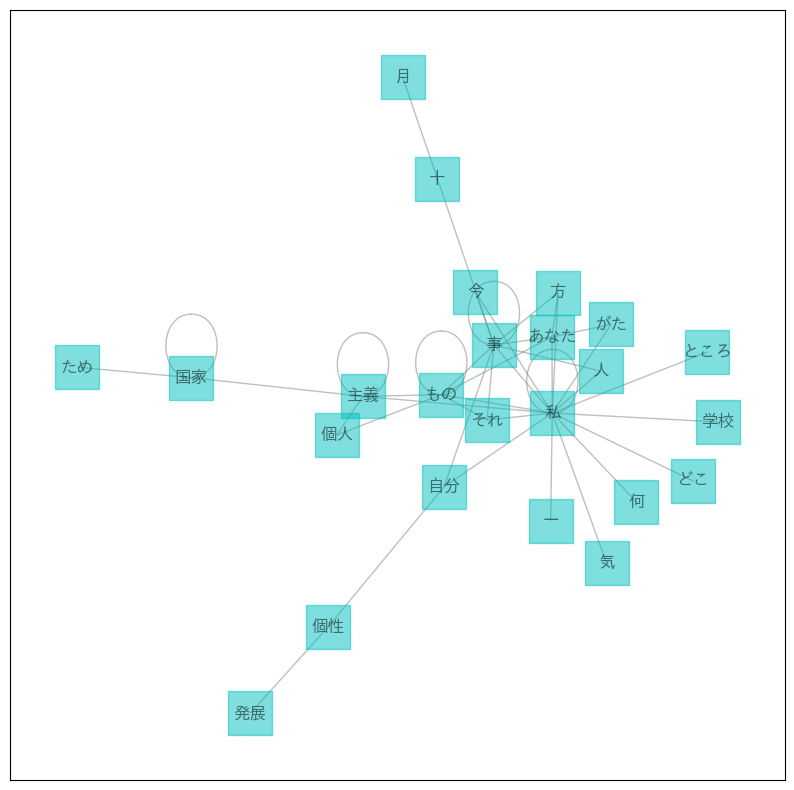

In [ ]:
# グラフオブジェクトの生成
G = nx.Graph()

# 重み付きデータの読み込み
G.add_weighted_edges_from(weighted_edges)

# ネットワーク図の描画
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=1.5)

nx.draw_networkx(G, pos, alpha=0.5,
                 node_shape = "s",
                 node_color = "c",
                 node_size = 1000,
                 edge_color = "gray",
                 font_family = "IPAexGothic") # フォント指定
plt.show()

【注意１】最新のAnaconda3では，decoratorのバージョンが5.0.6となっています．networkxでは，4.3を前提としているようなので，エラーが出るようなら，
anaconda promptから

pip install decorator==4.3

で5.0.6をuninstallして，4.3.0をinstallしてください．バージョンは　conda list  で確認できます．

【注意2】MeCabのインストールは，まず，windows版の64bit用のmecabをインストールしてください．入手先は,

https://github.com/ikegami-yukino/mecab/releases/  　です．

次に，pythonのmecabラッパーをインストールします．anaconda promptから

pip install mecab

でインストールできます．